# Assignment 2: Classification
Student Name: Brendan Lai<br>
Student Number: 19241173

### Importing the basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import heatmap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sb

### Importing the data

In [2]:
data = pd.read_csv("bank_data.csv")

### Converting the categorical data to numerical data

In the data,  there are 2 columns with the catergorical values that need to be converted to numerical values. 

* Gender
* Country

Also, the dataset is complete and there is no null cell :))

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Converting the values of the "purchased" column

In [4]:
# Encode Countries and set unique numerical values for country
conds = [data['country'] == 'France', data['country'] == 'Spain', data['country'] == 'Germany']
vals = [0,1,2]

data['country'] = np.select(conds, vals)
data['country'].unique()

array([0, 1, 2])

Converting the values of the "gender" column

In [5]:
gender = {"Male":0, "Female":1}
data['gender'] = data['gender'].map(gender)
data['gender'].unique()

array([1, 0])

Let's check the dataset to see if chanages are applied

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  int64  
 3   gender            10000 non-null  int64  
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


### Cleaning the data from the outliers

Box plots before cleaning the data

<AxesSubplot:xlabel='churn', ylabel='credit_score'>

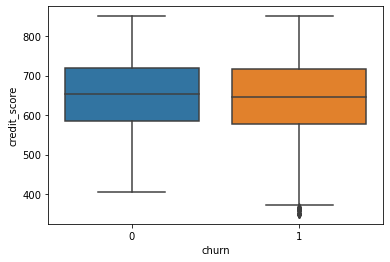

In [7]:
sb.boxplot(x='churn', y='credit_score', data=data)

We see that there are outliers for credit score < 400 so lets remove those  

In [8]:
data = data[data.credit_score >= 400]

<AxesSubplot:xlabel='churn', ylabel='age'>

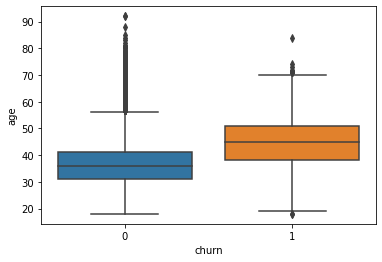

In [9]:
sb.boxplot(x='churn', y='age', data=data)

We see a significant set of outliers for age > 70 and age < 20

In [10]:
data = data[data.age > 20]
data = data[data.age < 70]

<AxesSubplot:xlabel='churn', ylabel='balance'>

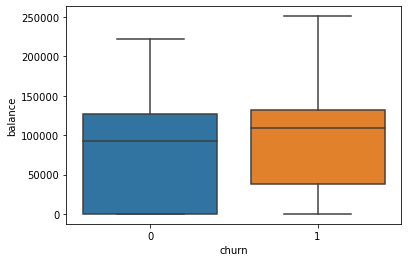

In [11]:
sb.boxplot(x='churn', y='balance', data=data)

<AxesSubplot:xlabel='churn', ylabel='estimated_salary'>

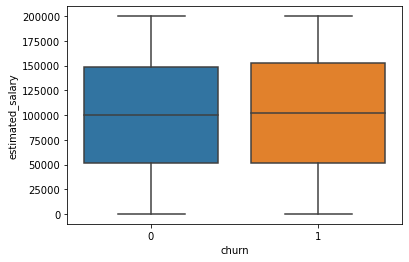

In [12]:
sb.boxplot(x='churn', y='estimated_salary', data=data)

In this instance we saw a set of outliers in the age and credit score features and removed the data accordingly

### Exploring the data

Here, we will check the correlation between "Purchased" column and the other colunms

You can find more info about the heatmap function in Seaborn [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

churn               1.000000
age                 0.331189
country             0.154016
balance             0.118646
gender              0.105359
estimated_salary    0.009316
customer_id        -0.006631
credit_card        -0.008087
tenure             -0.014239
credit_score       -0.014969
products_number    -0.048223
active_member      -0.151647
Name: churn, dtype: float64

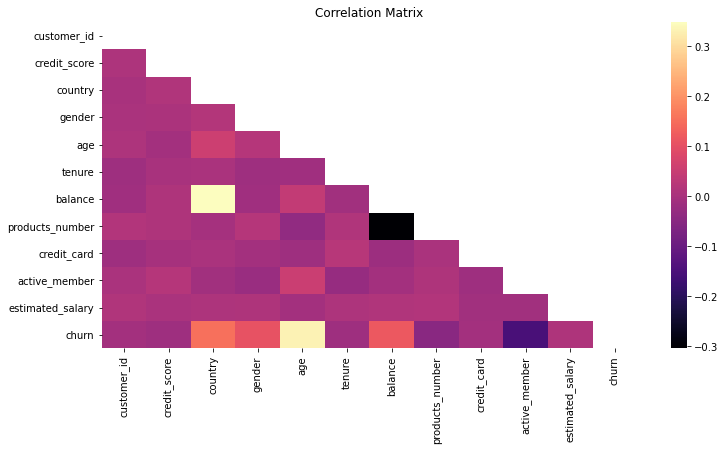

In [13]:
# creating the correlation matrix

corr_matrix = data.corr()


# visualizing the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  
plt.figure(figsize=(12, 6))  # to set the figure size
heatmap(corr_matrix, mask=mask, annot=False, lw=0, linecolor='white', cmap='magma', fmt='0.2f')
plt.title("Correlation Matrix")  # to add title 
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# getting the correlation values with the purchased column

  
corr_matrix['churn'].sort_values(ascending=False)  

### Splitting the train and test data

In [14]:
# select all columns except the target variable.
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

### Scaling the features

We standardize all the data using their mean and standard deviation

$$ \hat{x_i} = \frac{x_i-\mu}{\sigma_i}$$

In [15]:
# train_data, test_data = train_test_split(data, test_size=0.2)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 0)

Let's check the type of the data 

In [16]:
print(type(X_train))
print(type(Y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Exploring different machine learning tools

In [17]:
from sklearn.model_selection import cross_val_score
# importing the models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

Converting the output to numpy array and changing the shape

In [18]:
Y_train = Y_train.ravel()

#### Discriminant Analysis Classifier

In [19]:
da_clf = LinearDiscriminantAnalysis()
da_clf.fit(X_train, Y_train)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(da_clf, X_train, Y_train, scoring='accuracy', cv=5)  # 5-fold
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores = {}
avg_cv_scores['DA'] = np.average(scores)

[0.8042522  0.82331378 0.82038123 0.82611886 0.80777696]
Averaged prediction accuracy =  0.8163686064249337


#### Naive Bayes Classifier

In [20]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, Y_train)
scores = cross_val_score(nb_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['NB'] = np.average(scores)
# plot_prediction_results(nb_clf, X_train, Y_train)

[0.82404692 0.83357771 0.8372434  0.83492296 0.81438004]
Averaged prediction accuracy =  0.8288342086522098


#### K-Nearst Neighbors

In [21]:
knn_clf = KNeighborsClassifier(n_neighbors=5) # change n_neighbors; boundary becomes smoother with increasing value of K
knn_clf.fit(X_train, Y_train)
scores = cross_val_score(knn_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['KNN'] = np.average(scores)
# plot_prediction_results(knn_clf, X_train, Y_train)

[0.81158358 0.83357771 0.81964809 0.83565664 0.81438004]
Averaged prediction accuracy =  0.822969213589998


#### Linear SVM

In [22]:
svmln_clf = SVC(kernel='linear')
svmln_clf.fit(X_train, Y_train)
scores = cross_val_score(svmln_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['SVM-linear'] = np.average(scores)
# plot_prediction_results(svmln_clf, X_train, Y_train)

[0.79472141 0.79472141 0.79472141 0.79530448 0.79530448]
Averaged prediction accuracy =  0.7949546347435253


#### Nonlinear SVM (Gaussian Kernel)

In [23]:
svmrbf_clf = SVC(kernel='rbf')
svmrbf_clf.fit(X_train, Y_train)
scores = cross_val_score(svmrbf_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['SVM-nonlinear'] = np.average(scores)
# plot_prediction_results(svmrbf_clf, X_train, Y_train)

[0.84384164 0.86143695 0.84677419 0.84812913 0.86500367]
Averaged prediction accuracy =  0.8530371162456458


#### Decision Tree

In [24]:
tree_clf = DecisionTreeClassifier(max_depth=3) # Play with hyperparameter
tree_clf.fit(X_train, Y_train)
scores = cross_val_score(tree_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['Decision Tree'] = np.average(scores)
# plot_prediction_results(tree_clf, X_train, Y_train)

[0.83211144 0.84384164 0.83651026 0.83125459 0.84005869]
Averaged prediction accuracy =  0.8367553245277903


In [25]:
sorted_scores = sorted(avg_cv_scores.items(), key=lambda X:X[1], reverse=True)
sorted_scores

[('SVM-nonlinear', 0.8530371162456458),
 ('Decision Tree', 0.8367553245277903),
 ('NB', 0.8288342086522098),
 ('KNN', 0.822969213589998),
 ('DA', 0.8163686064249337),
 ('SVM-linear', 0.7949546347435253)]

#### using the models to predict the testset

In [26]:
test_pred_score = {}

In [27]:
# Naive Bayes Classifier
Y_test_pred_nb = nb_clf.predict(X_test)
test_pred_score['NB'] = accuracy_score(Y_test, Y_test_pred_nb)

# K-Nearst Neighbors
Y_test_pred_knn = knn_clf.predict(X_test)
test_pred_score['KNN'] = accuracy_score(Y_test, Y_test_pred_knn)

# Decision Tree
Y_test_pred_tree_clf = tree_clf.predict(X_test)
test_pred_score['Decision Tree'] = accuracy_score(Y_test, Y_test_pred_tree_clf)

# Linear SVM
Y_test_pred_svmln = svmln_clf.predict(X_test)
test_pred_score['SVM_Linear'] = accuracy_score(Y_test, Y_test_pred_svmln)

# Nonlinear SVM (Gaussian Kernel)
Y_test_pred_svmrbf = svmrbf_clf.predict(X_test)
test_pred_score['SVM_nonlinear'] = accuracy_score(Y_test, Y_test_pred_svmrbf)

In [28]:
sorted_scores = sorted(test_pred_score.items(), key=lambda X:X[1], reverse=True)
sorted_scores

[('SVM_nonlinear', 0.8525487512829285),
 ('Decision Tree', 0.8426274375641464),
 ('KNN', 0.8258638385220664),
 ('NB', 0.8251796099897366),
 ('SVM_Linear', 0.7947314403010606)]

### Concluding Analysis


From these results we can see that hte SVM Non linear model performed the best while hte SVM linear model performed the worst. The rankings were as follows:
1. SVM Non-Linear: 86%
2. Decision Tree: 84%
3. Naive Bayes: 83%
4. K-Nearest Neighbour: 82%
5. SVM Linear: 80%

Note: I spoke with Ahmad about an extension which explains the late submission. If necessary I can attach the email thread for verification.